In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge

In [2]:
# import dataset library
boston = pd.read_csv(r'C:\Users\sushmitha\Downloads\archive (6)\HousingData.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
boston.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1


In [7]:
print(boston.PTRATIO)

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64


In [8]:
print(boston.ZN)

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64


In [9]:
boston.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [10]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
x = boston.drop('AGE',axis=1)
y = boston['AGE']
print(x)
print(y)
print('shape of x = ', x.shape)
print('shape of y = ', y.shape)

        CRIM    ZN  INDUS  CHAS    NOX     RM     DIS  RAD  TAX  PTRATIO  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  4.0900    1  296     15.3   
1    0.02731   0.0   7.07   0.0  0.469  6.421  4.9671    2  242     17.8   
2    0.02729   0.0   7.07   0.0  0.469  7.185  4.9671    2  242     17.8   
3    0.03237   0.0   2.18   0.0  0.458  6.998  6.0622    3  222     18.7   
4    0.06905   0.0   2.18   0.0  0.458  7.147  6.0622    3  222     18.7   
..       ...   ...    ...   ...    ...    ...     ...  ...  ...      ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  2.4786    1  273     21.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  2.2875    1  273     21.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  2.1675    1  273     21.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  2.3889    1  273     21.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  2.5050    1  273     21.0   

          B  LSTAT  MEDV  
0    396.90   4.98  24.0  
1    396.90   9.14  21.6  
2    3

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('shape of x_train =', x_train.shape)
print('shape of y_train =', y_train.shape)
print('shape of x_test =', x_train.shape)
print('shape of y_test =', y_train.shape)

shape of x_train = (404, 13)
shape of y_train = (404,)
shape of x_test = (404, 13)
shape of y_test = (404,)


In [13]:
x=np.array(x)
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [14]:
print(boston.RAD)

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: int64


In [15]:
# fix in price into the df
boston['NOX'] = boston.CRIM

In [16]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


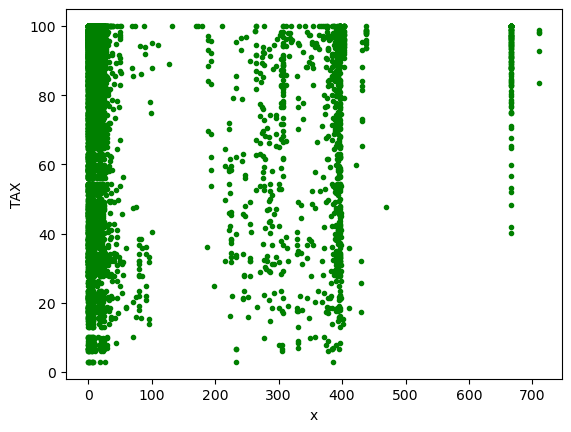

In [17]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("TAX",)
plt.show()

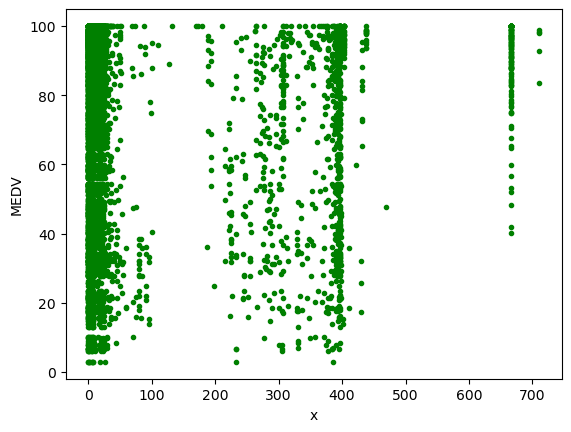

In [18]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("MEDV",)
plt.show()

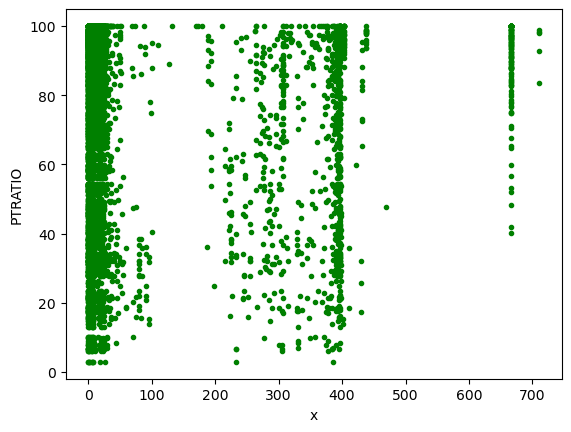

In [19]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("PTRATIO",)
plt.show()

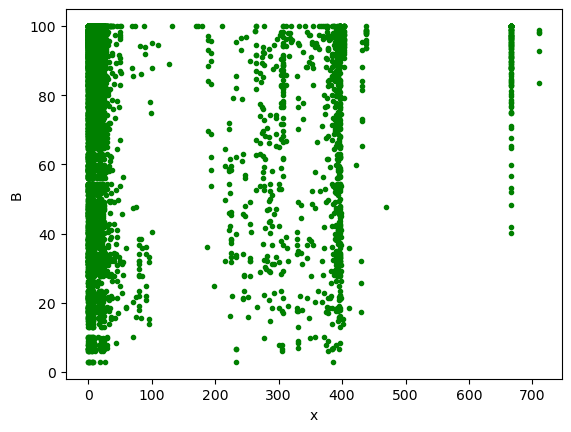

In [20]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("B",)
plt.show()

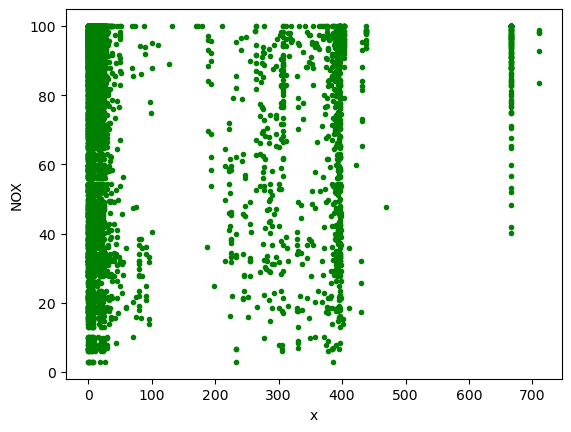

In [21]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("NOX",)
plt.show()

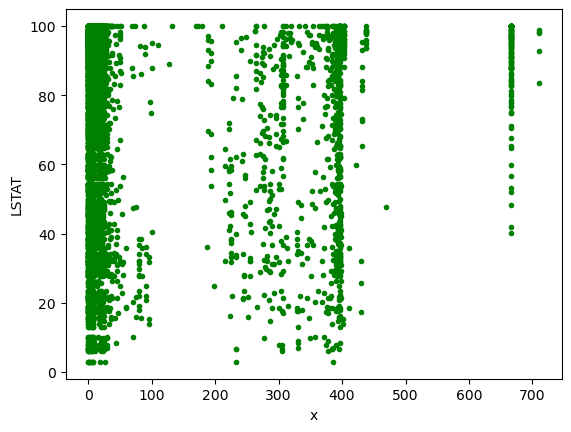

In [22]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("LSTAT",)
plt.show()

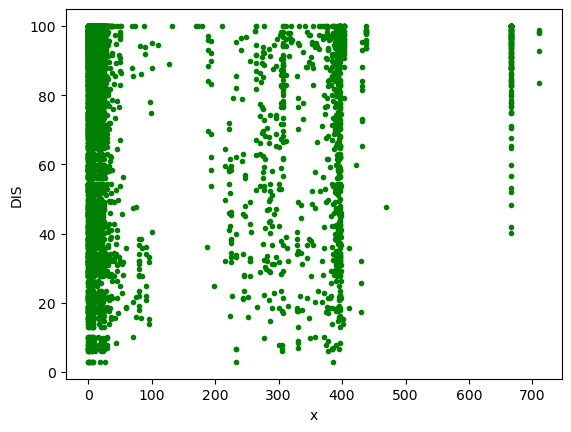

In [23]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("DIS",)
plt.show()

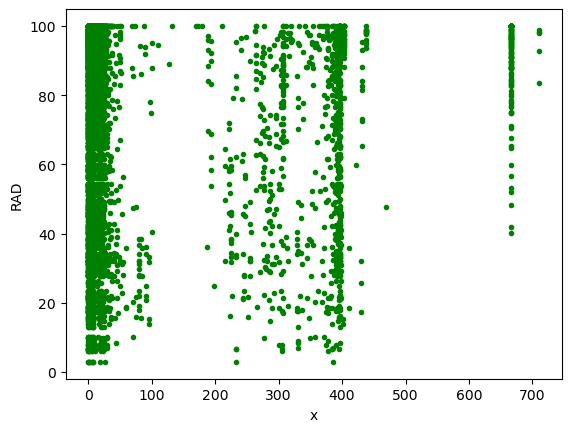

In [24]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("RAD",)
plt.show()

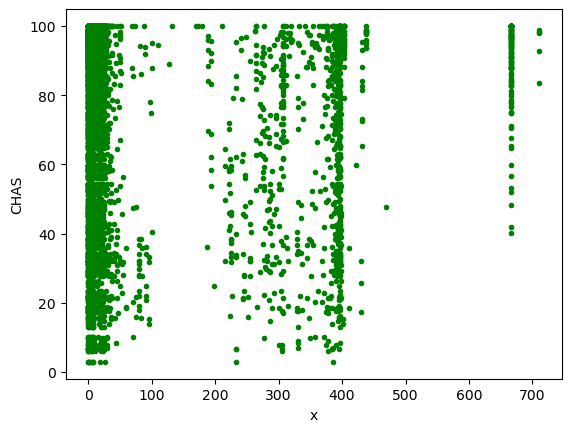

In [25]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("CHAS",)
plt.show()

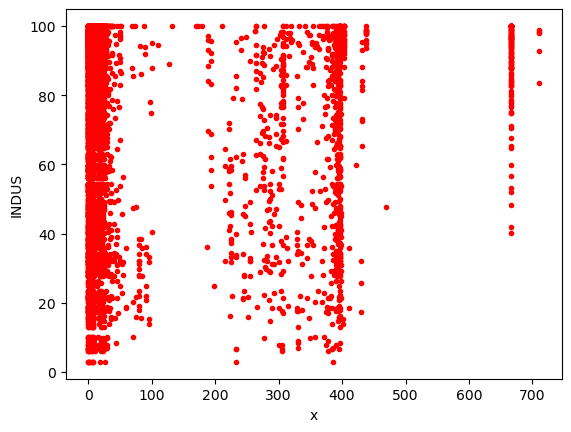

In [26]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'r.')
plt.xlabel("x")
plt.ylabel("INDUS",)
plt.show()

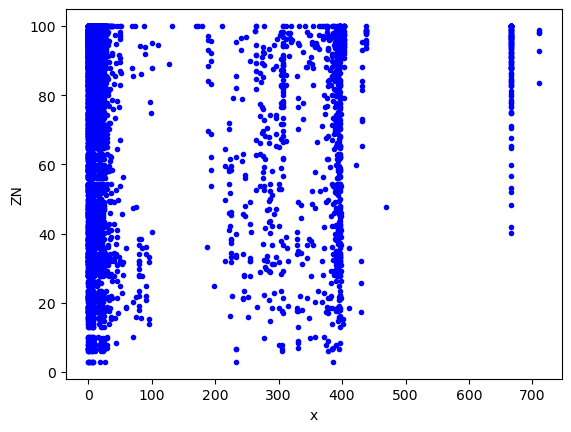

In [27]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'b.')
plt.xlabel("x")
plt.ylabel("ZN",)
plt.show()

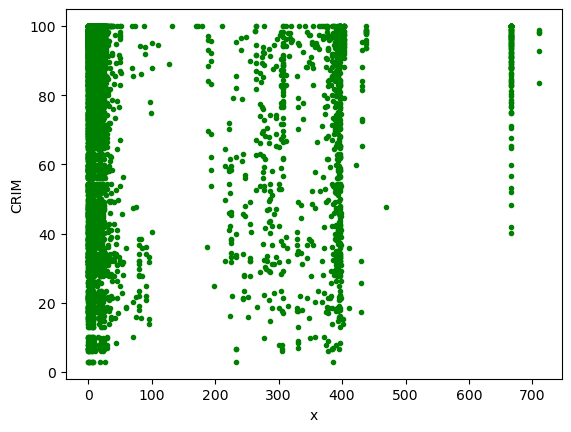

In [28]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("CRIM",)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[ 1.26896396 -0.49203912  1.05396671 ... -0.07433689  1.7534816
  -1.1583531 ]
 [-0.33045356 -0.49203912 -0.39987749 ...  0.4301838  -0.56561759
  -0.3107673 ]
 [-0.39630672         nan -0.70349155 ...  0.06529747 -0.65589882
  -0.36441197]
 ...
 [-0.39848987  2.92892006 -1.29466314 ...  0.37901005 -0.91545737
   0.18276368]
 [ 0.83977908 -0.49203912  1.05396671 ... -2.69458597  1.52213594
  -1.00814802]
 [-0.37474193 -0.49203912 -0.33857081 ... -3.12158061 -0.26091842
  -0.45024344]]
[[-0.38996061 -0.49203912         nan ...  0.42887165 -0.48521086
   0.08620327]
 [-0.39388693  1.21844047 -0.65240264 ...  0.44418004 -1.26247586
   1.03034948]
 [-0.38840963 -0.49203912  2.46110107 ...  0.36993437  0.78860092
  -0.98669015]
 ...
 [ 1.16089559 -0.49203912  1.05396671 ... -3.5124912   1.23295387
  -0.60044852]
 [-0.39439356 -0.49203912 -0.93266177 ...  0.43422959  0.05365525
  -0.03181501]
 [-0.38958953 -0.49203912  0.2847138  ...  0.29470458 -0.49931731
  -0.14983328]]


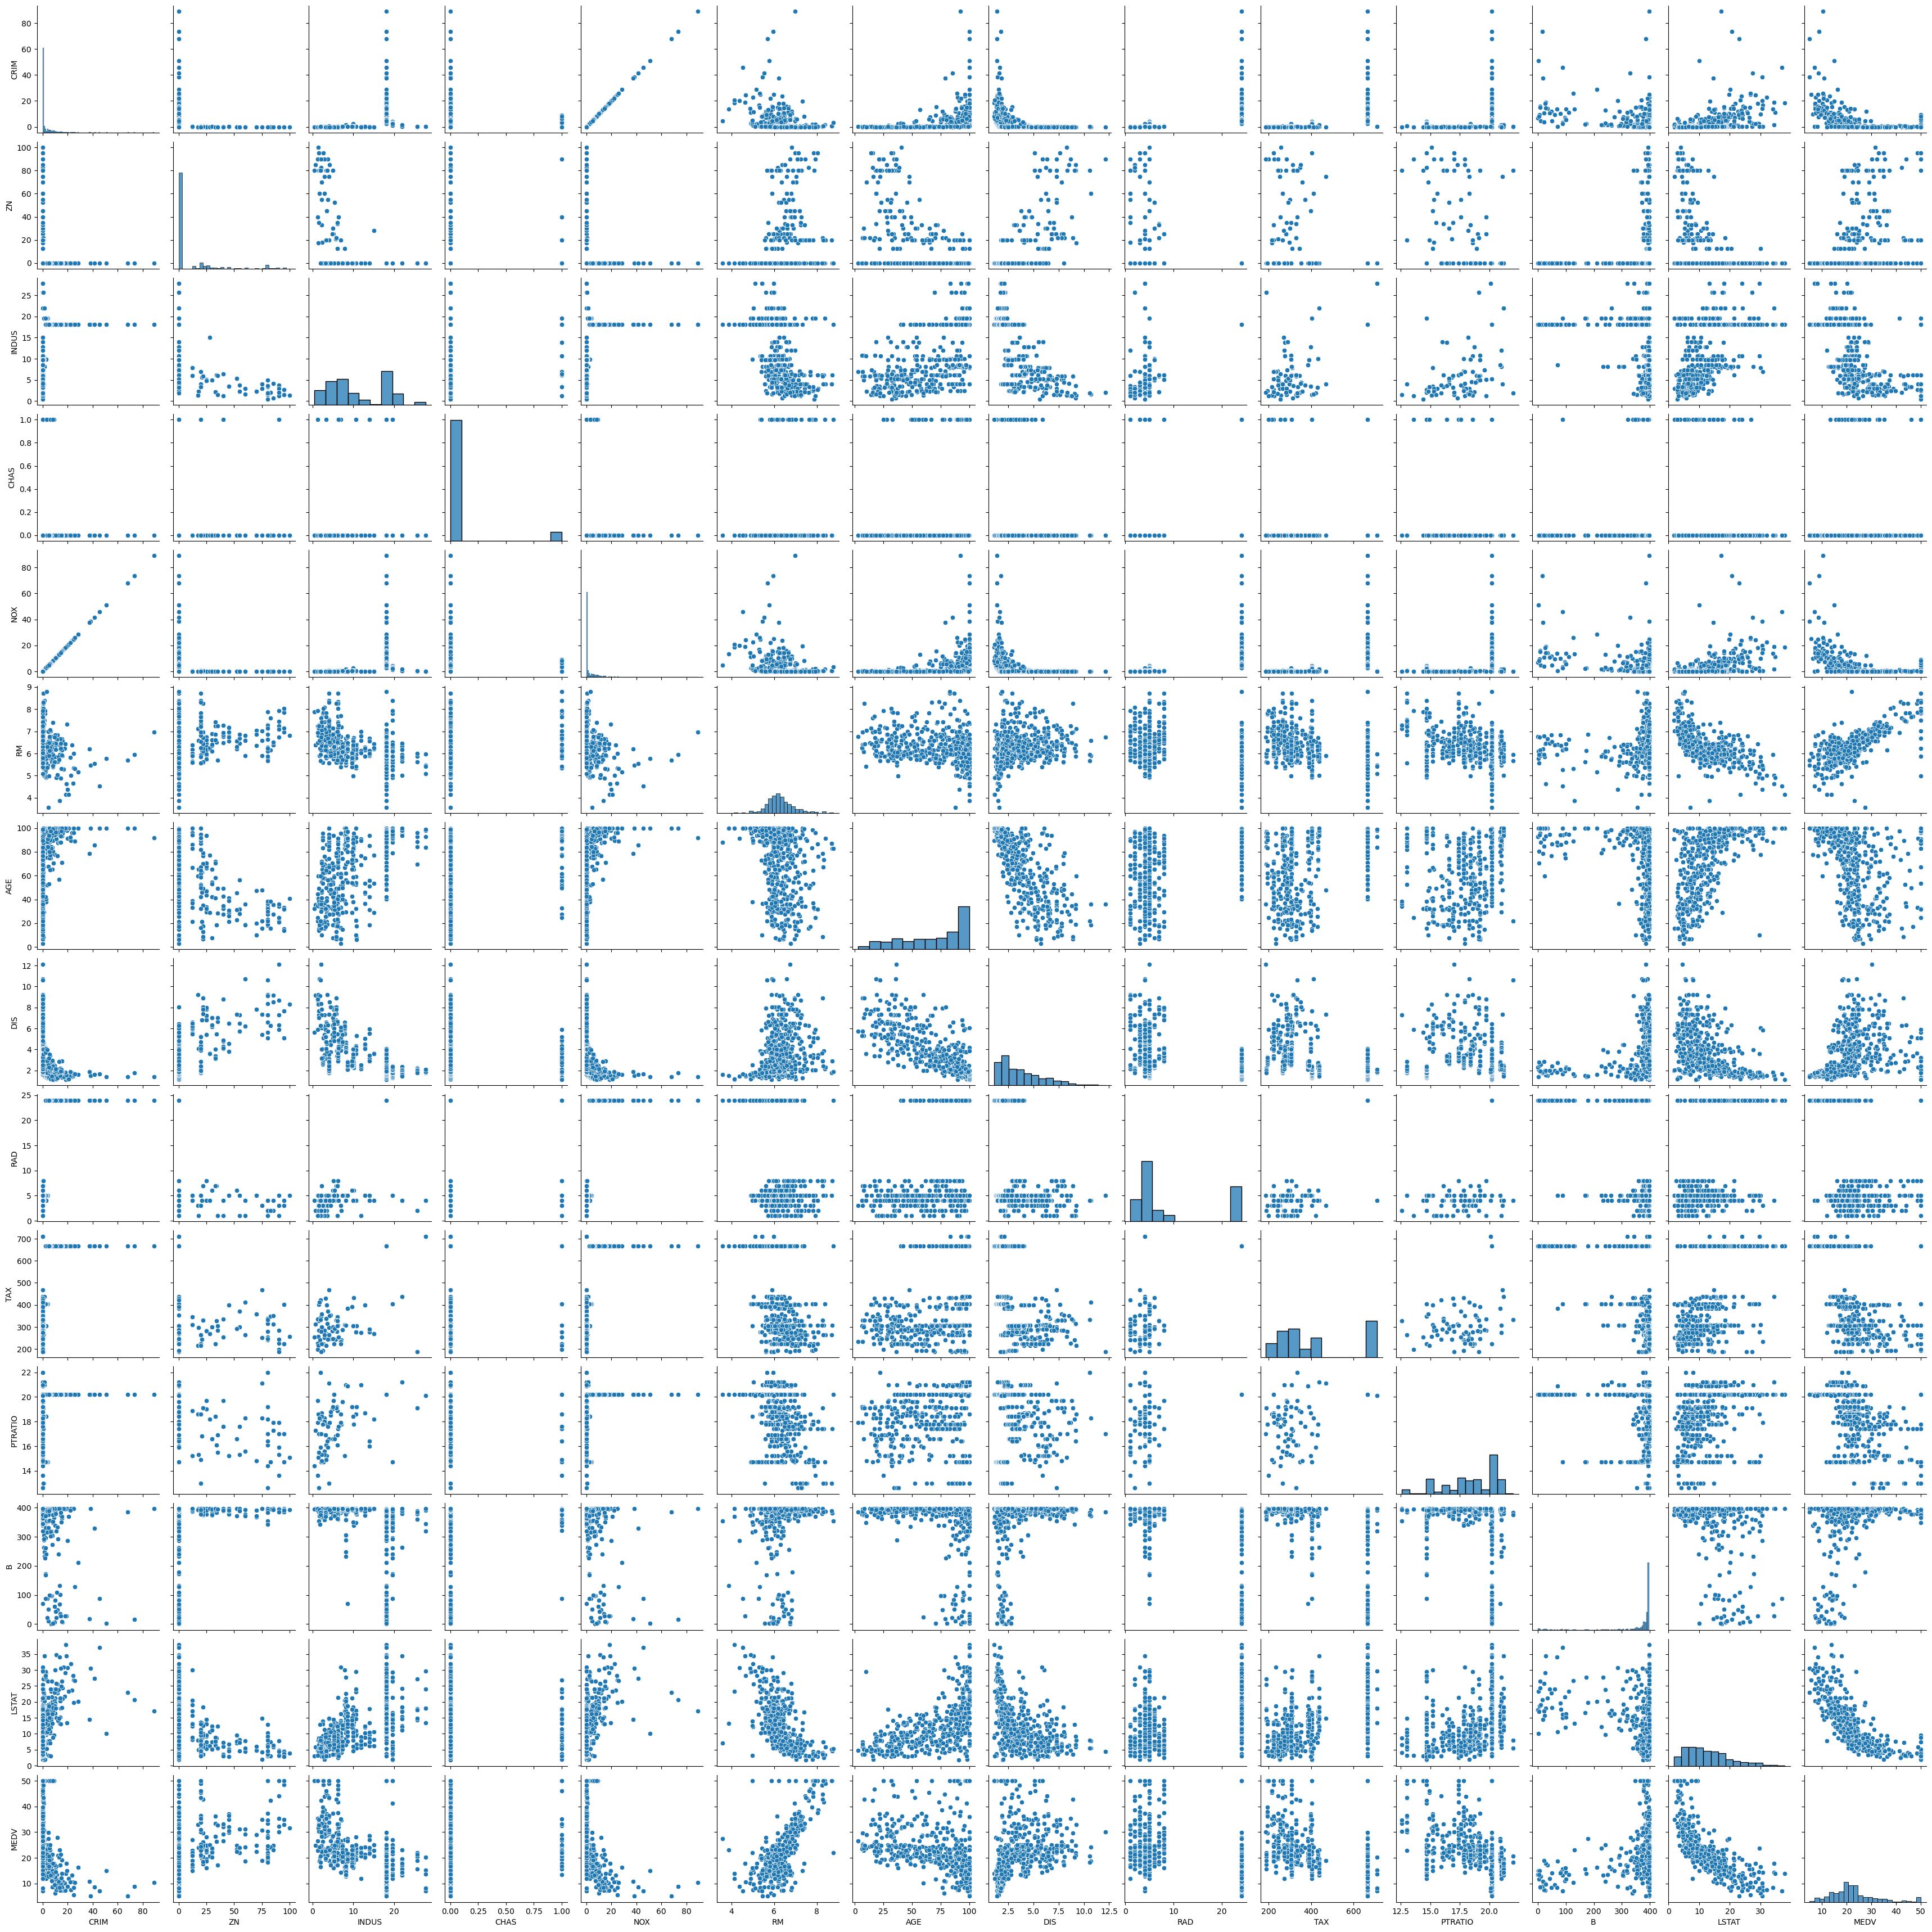

In [30]:
# visualize using a pairplot
sns.pairplot(boston)

<AxesSubplot:>

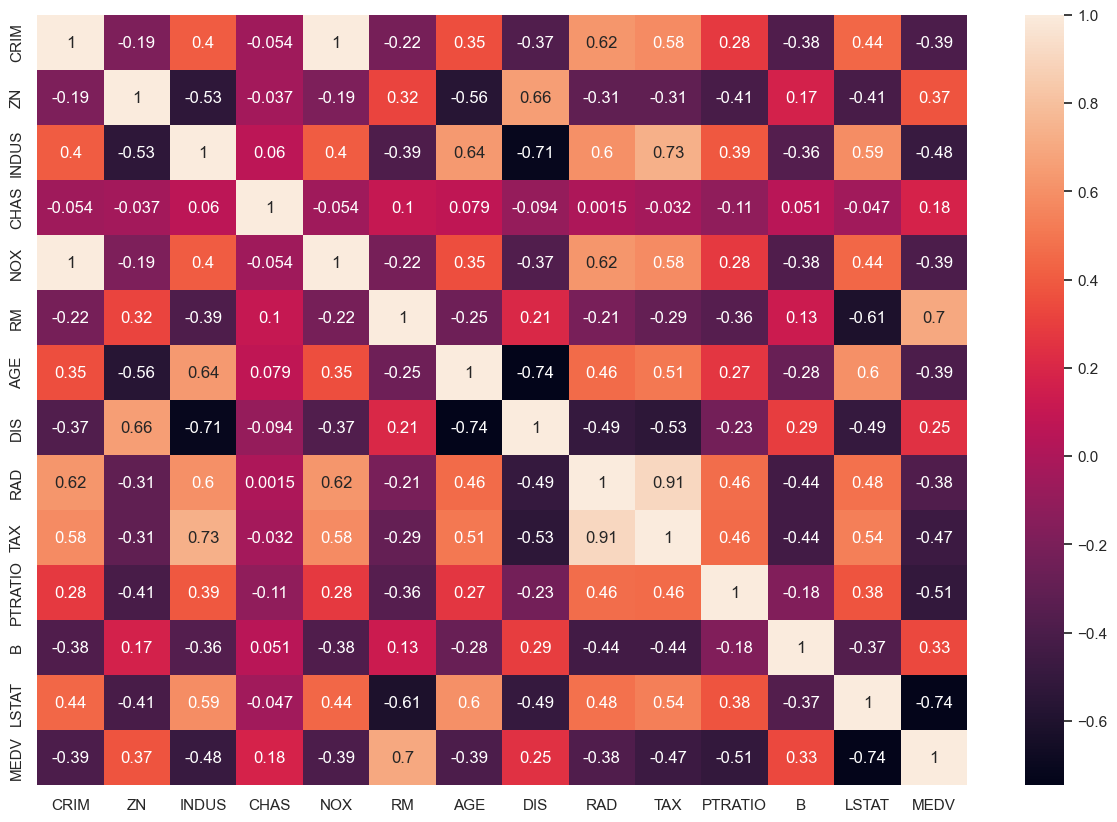

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(boston.corr(), annot=True)

In [32]:
# select the important features having correlation of +0.5 amd -0.5
dep_feat = list(boston.corr()['TAX'][(boston.corr()['TAX']>+0.4)|(boston.corr()['TAX']<-0.4)].index)
dep_feat

['CRIM',
 'INDUS',
 'NOX',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[ 1.26896396 -0.49203912  1.05396671 ... -0.07433689  1.7534816
  -1.1583531 ]
 [-0.33045356 -0.49203912 -0.39987749 ...  0.4301838  -0.56561759
  -0.3107673 ]
 [-0.39630672         nan -0.70349155 ...  0.06529747 -0.65589882
  -0.36441197]
 ...
 [-0.39848987  2.92892006 -1.29466314 ...  0.37901005 -0.91545737
   0.18276368]
 [ 0.83977908 -0.49203912  1.05396671 ... -2.69458597  1.52213594
  -1.00814802]
 [-0.37474193 -0.49203912 -0.33857081 ... -3.12158061 -0.26091842
  -0.45024344]]
[[-0.38996061 -0.49203912         nan ...  0.42887165 -0.48521086
   0.08620327]
 [-0.39388693  1.21844047 -0.65240264 ...  0.44418004 -1.26247586
   1.03034948]
 [-0.38840963 -0.49203912  2.46110107 ...  0.36993437  0.78860092
  -0.98669015]
 ...
 [ 1.16089559 -0.49203912  1.05396671 ... -3.5124912   1.23295387
  -0.60044852]
 [-0.39439356 -0.49203912 -0.93266177 ...  0.43422959  0.05365525
  -0.03181501]
 [-0.38958953 -0.49203912  0.2847138  ...  0.29470458 -0.49931731
  -0.14983328]]


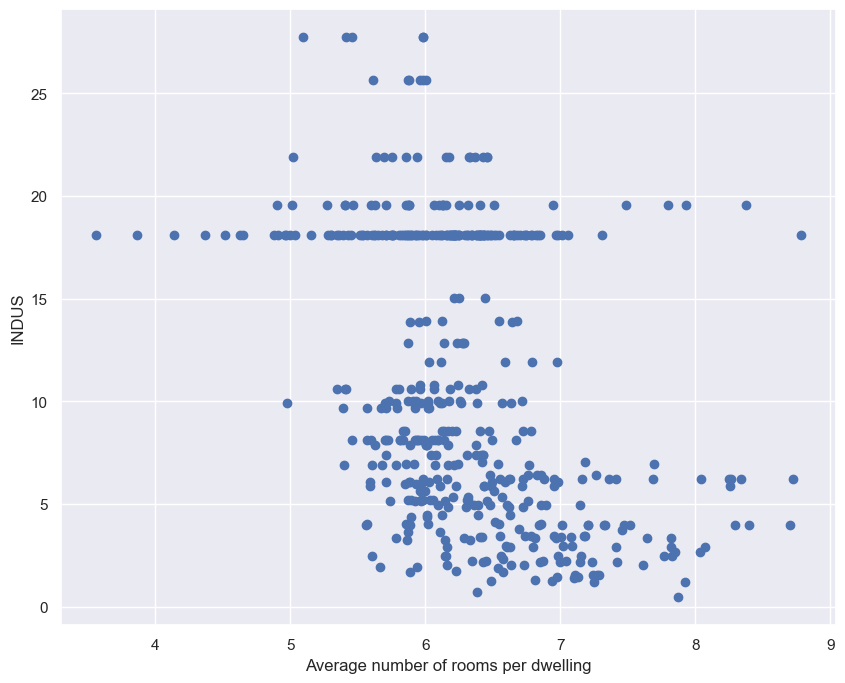

In [34]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['RM'], boston['INDUS'])
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("INDUS")
plt.show()

In [35]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,1.000000,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.191178,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.401863,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,-0.054355,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,1.000000,-0.191178,0.401863,-0.054355,1.000000,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
RM,-0.219150,0.320800,-0.390234,0.104885,-0.219150,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.354342,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.374166,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.624765,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.580595,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


<AxesSubplot:>

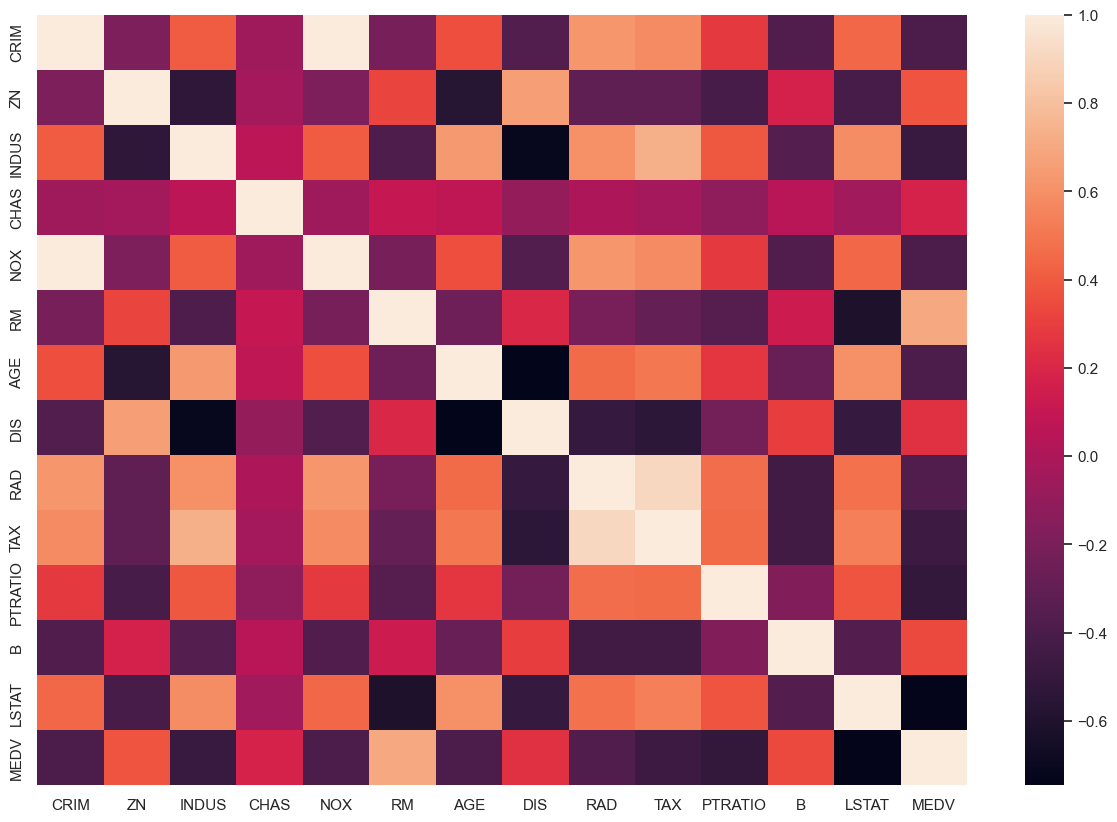

In [36]:
sns.heatmap(boston.corr())

In [37]:
print(boston.DIS)

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64


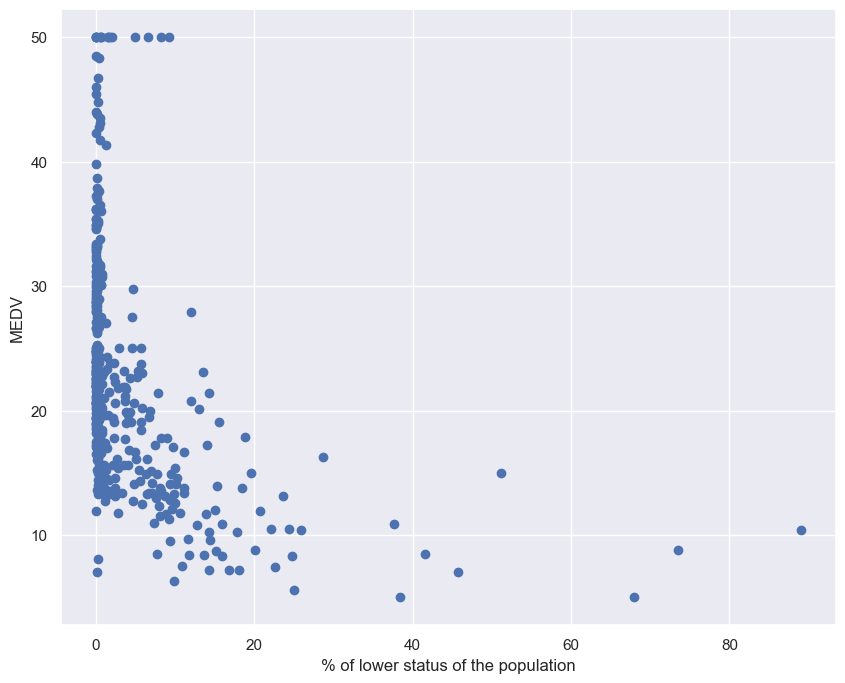

In [38]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['CRIM'],boston['MEDV'])
plt.xlabel("% of lower status of the population")
plt.ylabel("MEDV")
plt.show()

In [39]:
# select the important features having correlation of +0.5 amd -0.5
dep_feat = list(boston.corr()['AGE'][(boston.corr()['AGE']>+0.4)|(boston.corr()['AGE']<-0.4)].index)
dep_feat

['ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']

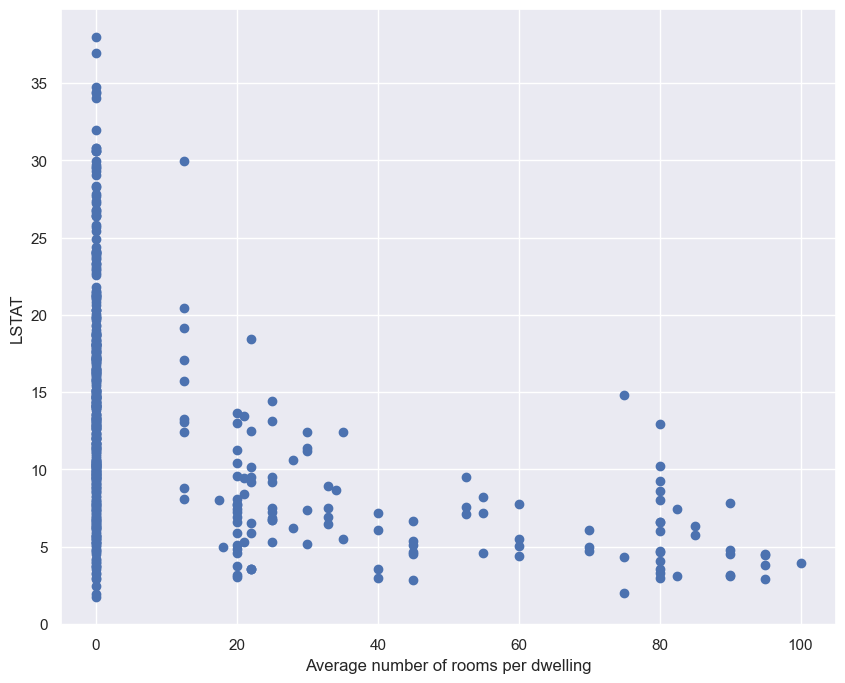

In [40]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['ZN'], boston['LSTAT'])
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("LSTAT")
plt.show()

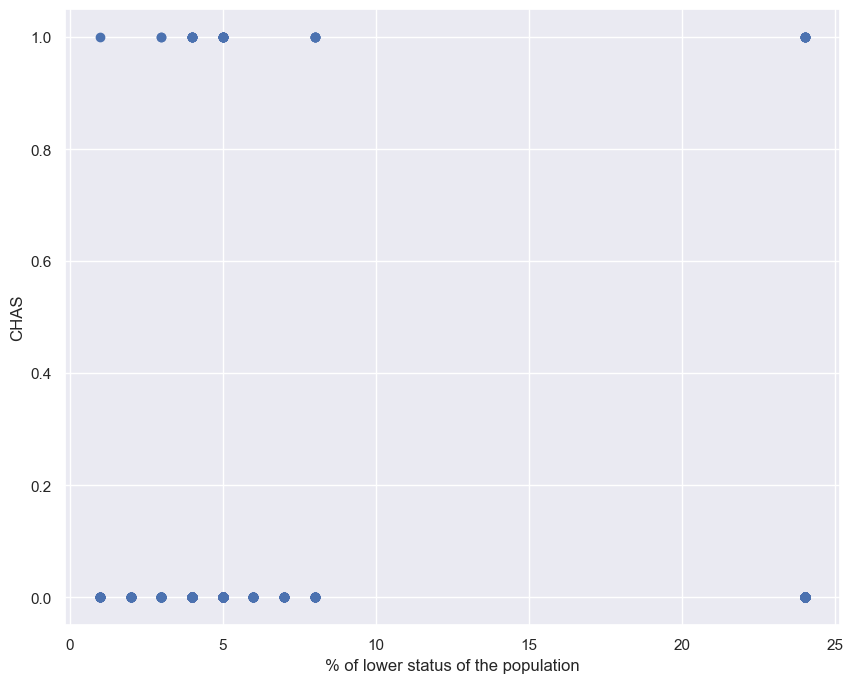

In [41]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['RAD'],boston['CHAS'])
plt.xlabel("% of lower status of the population")
plt.ylabel("CHAS")
plt.show()

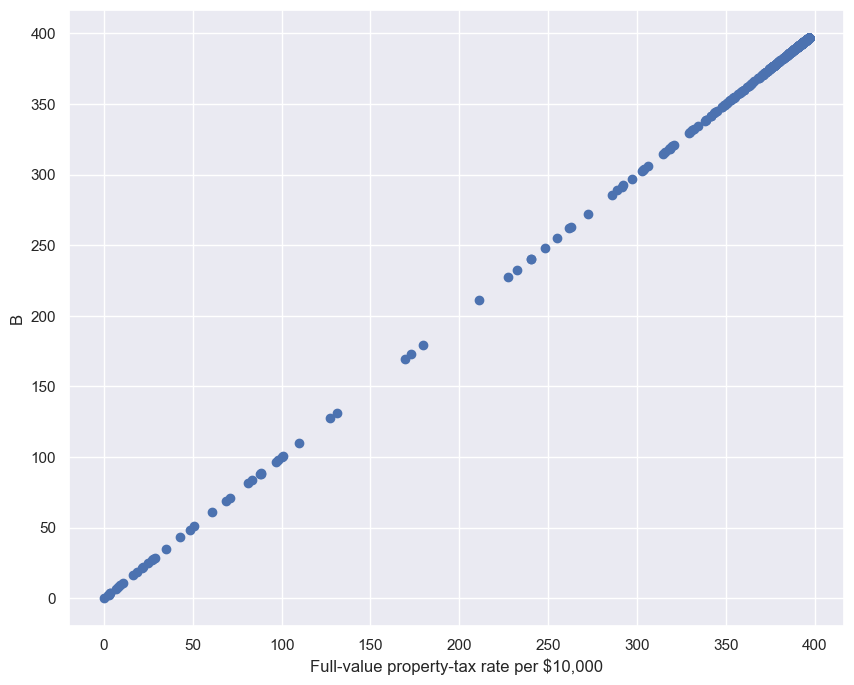

In [42]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['B'],boston['B'])
plt.xlabel("Full-value property-tax rate per $10,000")
plt.ylabel("B")
plt.show()

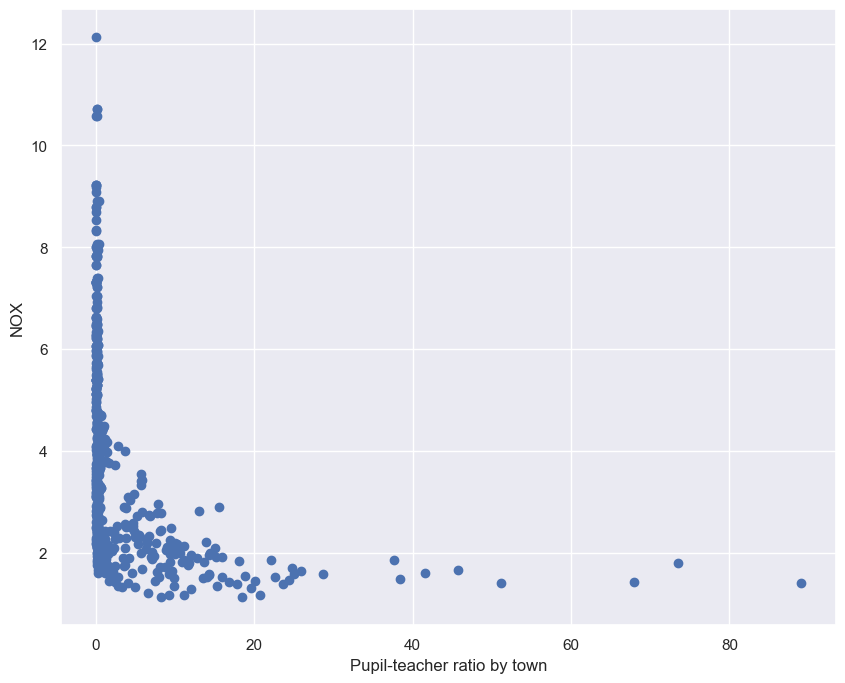

In [43]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['NOX'],boston['DIS'])
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("NOX")
plt.show()

In [44]:
# Select dependent and independent feature
X=boston.iloc[:,:-1]
y=boston.iloc[:,-1]

In [45]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=10)

In [46]:
# Standardize the dataset
# import the library
from sklearn.preprocessing import StandardScaler
# run now
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import Ridge

In [48]:
rdg=Ridge()

In [49]:
import numpy as np

In [50]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

# Check for missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [51]:
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX        20
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [52]:
rdg.fit(X_train, y_train)

Ridge()